<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Clustering.csv',index_col=0)
df

,x,y
1,3.367596,3.536694
2,2.667870,4.479919
3,1.344171,3.282591
4,1.389414,4.683227
5,1.644644,4.320822
...,...,...
186,8.610144,10.429247
187,6.775686,11.724382
188,7.023465,9.632056
189,6.115584,9.449803


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [20]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки\n'

In [21]:
# your_code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 1 to 190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       190 non-null    float64
 1   y       190 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


<Axes: >

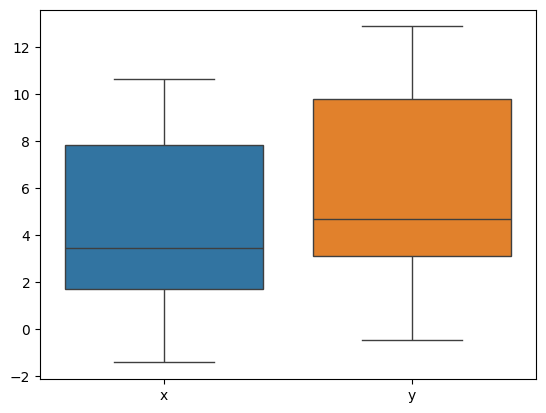

In [22]:
df_clust = df.copy()
sns.boxplot(df)
#есть два столбца , выбросов на графике нет

In [23]:
df_clust.describe()
#получим описание по кластерам

,x,y
count,190.000000,190.000000
mean,4.721308,6.345303
std,3.294171,3.614820
min,-1.428115,-0.476742
25%,1.713220,3.126976
50%,3.462090,4.697728
75%,7.858967,9.802251
max,10.674577,12.894445


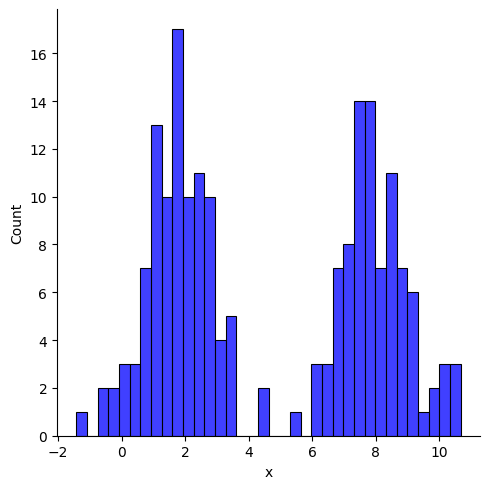

In [31]:
sns.displot(df_clust['x'], kind='hist',
             bins=int(180/5), color = 'blue')
#получим визуализацию по X

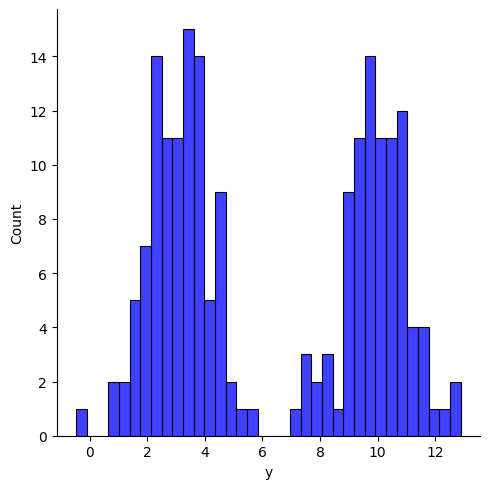

In [36]:
sns.displot(df_clust['y'], kind='hist',
             bins=int(180/5), color = 'blue')
#получим визуализацию по Y

У нас наблюдается неравномерность распределения значений в колонках, отвечающих за вес в граммах и цены. Вероятно, имеется слишком большой разброс в значениях, особенно в случае цен, где заметен значительный рост вверх.Для улучшения ситуации и придания более стабильного характера данным предлагается использовать метод мин-макс для масштабирования значений во всех выбранных колонках.

In [37]:
min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_clust[['x','y']])
df_clust[['x','y']] = min_max_scal
df_clust.x.unique()
#LabelEncoder не ипользуем так как отсутствуют категориальных данных

array([0.39625158, 0.33843583, 0.22906359, 0.23280182, 0.25389052,
       0.18212001, 0.38770021, 0.10290838, 0.21204621, 0.18072669,
       0.29684648, 0.11024952, 0.26249062, 0.28968614, 0.32098993,
       0.16879138, 0.35027143, 0.34269169, 0.27605419, 0.38502061,
       0.23893627, 0.28489946, 0.3266028 , 0.32849916, 0.20306065,
       0.40741214, 0.25857869, 0.22970259, 0.13674898, 0.24193391,
       0.32631489, 0.30289945, 0.28323116, 0.33515978, 0.41406849,
       0.22342707, 0.13895249, 0.2706922 , 0.34093787, 0.16603197,
       0.22022609, 0.2501325 , 0.1303623 , 0.27248077, 0.30416699,
       0.26808861, 0.29399103, 0.31119397, 0.22361286, 0.27556969,
       0.30762426, 0.32353084, 0.37794454, 0.1747661 , 0.12776834,
       0.38478118, 0.18695936, 0.33865645, 0.20023727, 0.27231004,
       0.18529645, 0.15237889, 0.21735152, 0.20295573, 0.35153526,
       0.05881404, 0.3285402 , 0.26373556, 0.25654732, 0.24883287,
       0.27182819, 0.        , 0.20053933, 0.3505963 , 0.29014

Text(0, 0.5, 'y')

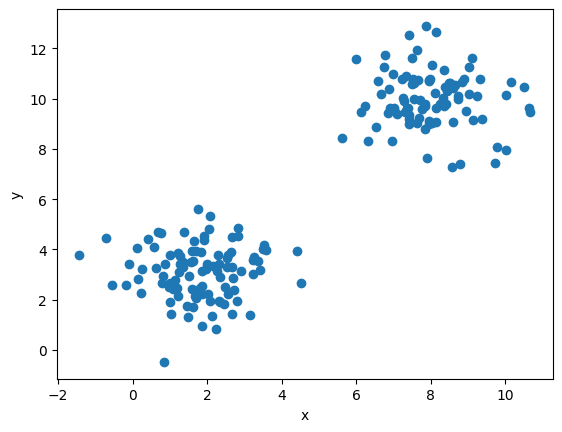

In [41]:
plt.scatter(df["x"], df["y"])
plt.xlabel('x')
plt.ylabel('y')
#распределение данных в двумерном пространстве

In [38]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

In [42]:
# your_code here
X = df[["x", "y"]]
X

,x,y
1,3.367596,3.536694
2,2.667870,4.479919
3,1.344171,3.282591
4,1.389414,4.683227
5,1.644644,4.320822
...,...,...
186,8.610144,10.429247
187,6.775686,11.724382
188,7.023465,9.632056
189,6.115584,9.449803


In [48]:

kmeans = KMeans(n_clusters=2,n_init=10)
# Создаем экземпляр модели K-Means


kmeans.fit(X)
# Производим кластеризацию данных


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
# Получаем центры кластеров и прогнозируем принадлежность к кластерам

In [49]:
print(cluster_centers)

[[8.0026474  9.97011676]
 [1.768103   3.0829712 ]]


In [50]:
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


Оптимальное число кластеров Calinski Harabasz Score 2, с баллом 1764.399218639718


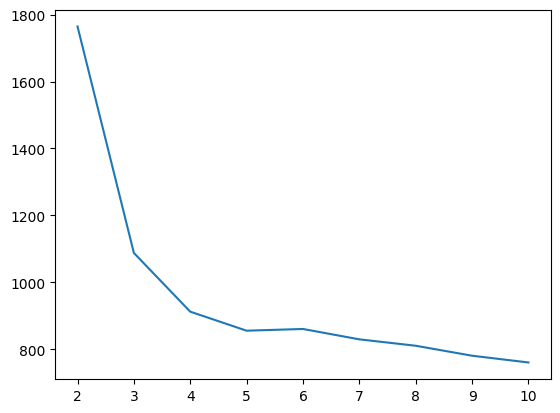

In [90]:
score_1 = []



for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(min_max_scal)
  score_1.append(calinski_harabasz_score(df_clust,kmeans.labels_))
  
  

print(f"Оптимальное число кластеров Calinski Harabasz Score {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")

fig, axs = plt.subplots(nrows= 1 , ncols= 1 )
axs.plot(range(2, 11), score_1)


Оптимальное число кластеров Silhouette Score 2, с баллом 0.795572649620447


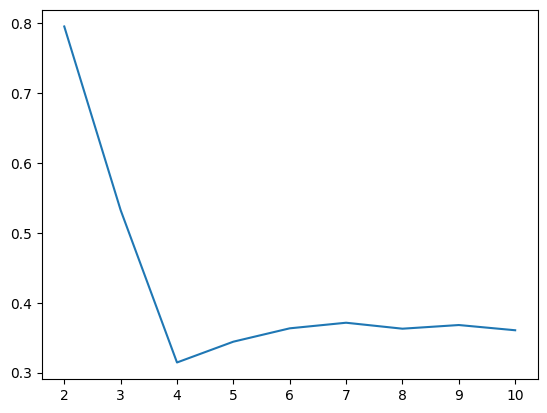

In [92]:
score_2 = []

for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(min_max_scal)
  
  score_2.append(silhouette_score(df_clust,kmeans.labels_))

print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")

fig, axs= plt.subplots(nrows= 1 , ncols= 1 )

axs.plot(range(2, 11), score_2)

Оптимальное число кластеров Davies Bouldin Score 2, с баллом 0.2867702550663726


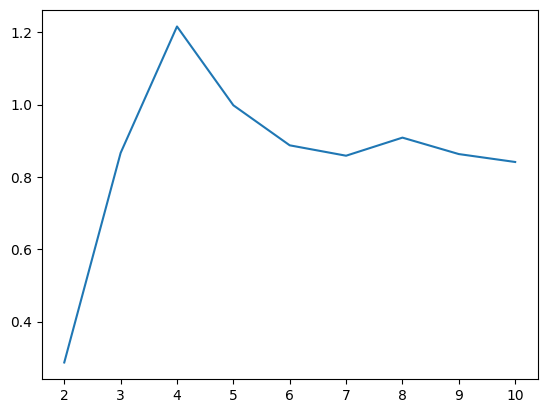

In [89]:
score_3 = []

for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(min_max_scal)
  
  score_3.append(davies_bouldin_score(df_clust,kmeans.labels_))

print(f"Оптимальное число кластеров Davies Bouldin Score {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")

fig, axs= plt.subplots(nrows= 1 , ncols= 1 )

axs.plot(range(2, 11), score_3)

выбрано два кластера для анализа, поскольку результаты метрик указывают на оптимальное количество кластеров равное двум.

In [7]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров k-means\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

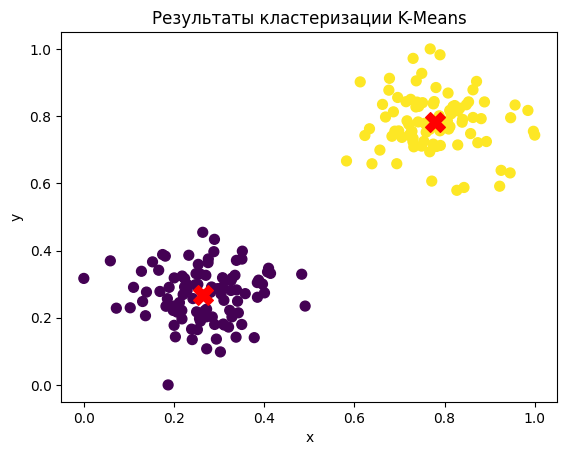

In [93]:
# your_code here
kmeans = KMeans(n_clusters= 2,n_init = 10,random_state = 42)
kmeans.fit(min_max_scal)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
plt.scatter(df_clust['x'], df_clust['y'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [9]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

'\nЗдесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?\n'

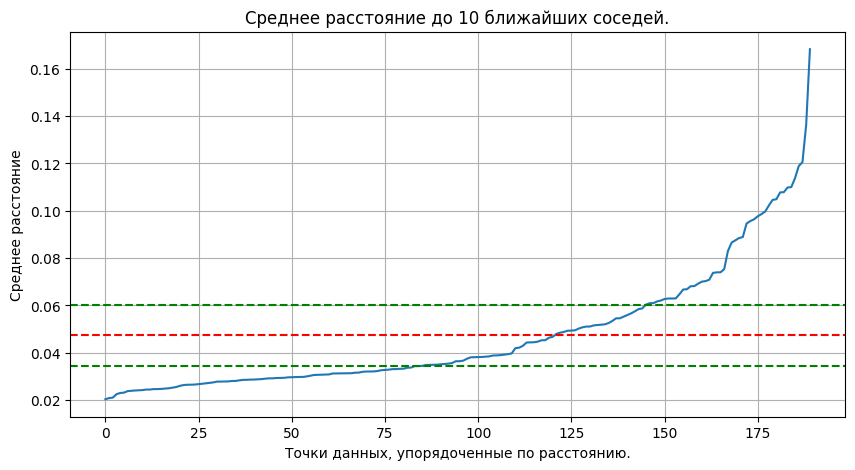

Оптимальный EPS = 0.04731330936035712


In [96]:
# your_code here
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score


mid_range = [] #пустой список в него будут добавляться средние расстояния



for i, v1 in enumerate(min_max_scal):                                                       # Проходимся по каждой строке в исходном DataFrame                                                                               
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(min_max_scal) if i != j]     # Вычисляем расстояния от текущей точки до всех остальных
    mid_range.append(np.mean(sorted(distances)[:10]))                                       # Вычисляем среднее расстояние до 5 ближайших 


mid_range = sorted(mid_range) # Сортируем средние расстояния


plt.figure(figsize=(10, 5))     # Строим график
plt.plot(range(len(mid_range)), mid_range)
plt.title('Среднее расстояние до 10 ближайших соседей.')
plt.xlabel('Точки данных, упорядоченные по расстоянию.')
plt.ylabel('Среднее расстояние')
plt.grid(True)



plt.axhline(y=np.mean(mid_range) + np.std(mid_range) / 2, color='g', linestyle='--') # Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(mid_range), color='r', linestyle='--')
plt.axhline(y=np.mean(mid_range) - np.std(mid_range) / 2, color='g', linestyle='--')
'''График оптимального значения параметра EPS выделен зеленым цветом. 
 
Основная идея заключается в поиске значения, при котором изменения на графике становятся "стабильными".'''


plt.show()
print(f'Оптимальный EPS = {np.mean(mid_range)}')

In [11]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров DBSCAN\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

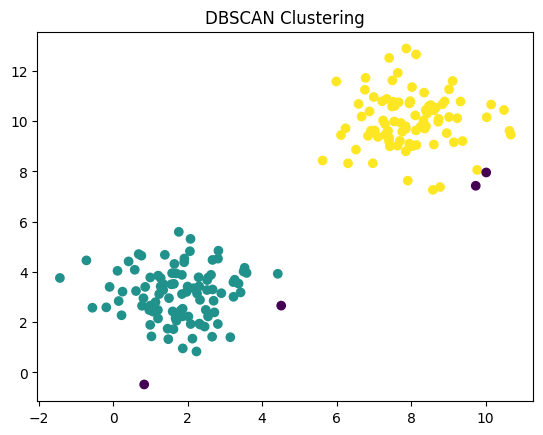

In [99]:
# your_code here
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN



x_scaler = StandardScaler().fit_transform(X)


dbscan = DBSCAN(eps=0.35, min_samples=5)                                            # Инициализация и обучение модели DBSCAN
dbscan.fit(x_scaler)


labels = dbscan.labels_                                                             # Получение меток кластеров для каждой точки (-1 означает выбросы)


plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')       # Визуализация результатов, темные точки - выбросы
plt.title('DBSCAN Clustering')
plt.show()

In [13]:
"""
Здесь иерархическая кластеризация и метрики
"""

'\nЗдесь иерархическая кластеризация и метрики\n'

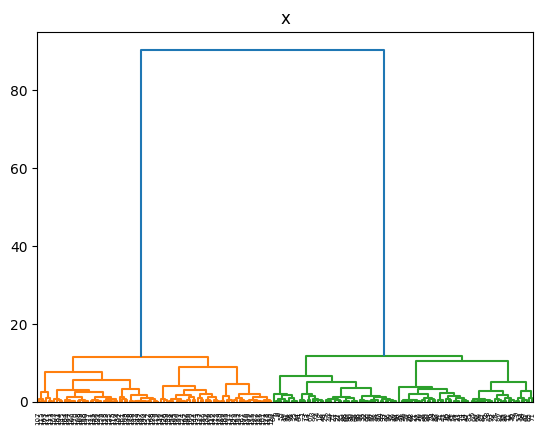

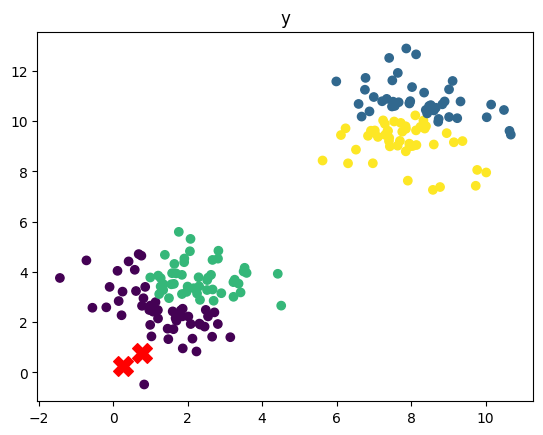

In [100]:
# your_code here

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


agg_clustering = AgglomerativeClustering(n_clusters=4)                                          # Инициализация и обучение модели иерархической кластеризации
agg_clustering.fit(X)


from scipy.cluster import hierarchy                                                             # Визуализация дендрограммы
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('x')
plt.show()


plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')   # Визуализация результатов кластеризации
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.title('y')
plt.show()

In [15]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров иерархической кластеризации\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [16]:
# your_code here

In [17]:
!pip install ydata-profiling

^C


Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here